In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, datetime, warnings
warnings.filterwarnings('ignore')

In [30]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506191400.pkl', 'rb'))
df

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,month_of_year_11,month_of_year_12,hour_of_day_9,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,is_open
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,False,False,True,False,False,False,False,False,False,1
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,False,False,True,False,False,False,False,False,False,0
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,False,False,False,True,False,False,False,False,False,0
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,False,False,False,True,False,False,False,False,False,0
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,False,False,False,False,False,False,False,True,False,0
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,False,False,False,False,False,False,False,False,True,0
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,False,False,False,False,False,False,False,False,True,0
2025-05-30 15:30:00,-0.13,-0.11,-0.31,-0.24,-0.11,-0.14,-0.49,-0.09,-0.15,-0.19,...,False,False,False,False,False,False,False,False,True,0


In [31]:
df.describe()

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,Oil_High-Low%,Oil_Last-Open,Oil_Last-Open%,Oil_Roll_SD_Last_10,Oil_Roll_SDSD_Last_10,Oil_Roll_SD_Volume_10,Oil_Roll_SDSD_Volume_10,Oil_MA4_Last,Oil_MA12_Last,is_open
count,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,...,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000,48280.000000
mean,-0.000600,0.000242,0.001277,0.001394,0.001753,0.001005,-0.000548,0.003200,0.000008,0.002747,...,0.001618,0.000547,0.000027,0.095208,0.036236,23230.064626,7508.737464,22.748263,22.747520,0.038587
std,0.719475,0.687331,0.592973,0.582258,0.307907,0.307609,0.715081,0.473239,0.511777,0.693680,...,0.002458,0.066172,0.003090,0.097212,0.044982,29320.819388,10987.230187,6.829409,6.828421,0.192611
min,-13.780000,-18.720000,-21.330000,-14.570000,-10.920000,-8.210000,-20.640000,-12.140000,-12.320000,-17.220000,...,0.000000,-1.490000,-0.155858,0.005164,0.000656,170.921164,36.797456,5.980250,5.999175,0.000000
25%,-0.230000,-0.250000,-0.190000,-0.170000,-0.100000,-0.110000,-0.230000,-0.140000,-0.180000,-0.200000,...,0.000227,-0.030000,-0.001190,0.040129,0.011589,7028.681834,1734.327437,18.138044,18.133646,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000964,0.000000,0.000000,0.066588,0.022126,13734.477354,3792.476877,21.735163,21.740004,0.000000
75%,0.220000,0.250000,0.190000,0.170000,0.100000,0.110000,0.220000,0.150000,0.170000,0.200000,...,0.002168,0.028900,0.001179,0.114717,0.043061,27050.311441,8495.442390,29.102500,29.099160,0.000000
max,36.140000,21.780000,18.340000,16.540000,9.390000,6.980000,25.750000,20.000000,16.470000,23.010000,...,0.184634,1.720000,0.085324,1.489842,0.646567,395517.960999,146787.396171,36.526250,36.366733,1.000000


In [32]:
df['lag_Change_Tone_AAL_8'] = df['Change_Tone_AAL_8'].shift(1)
df['lag_Change_Tone_AAL'] = df['Change_Tone_AAL'].shift(1)

In [23]:
df[['Change_Tone_AAL_8','lag_Change_Tone_AAL_8']]

,Change_Tone_AAL_8,lag_Change_Tone_AAL_8
2018-01-02 09:30:00,0.000000,NaN
2018-01-02 09:45:00,0.000000,0.000000
2018-01-02 10:00:00,1.821494,0.000000
2018-01-02 10:15:00,0.000000,1.821494
2018-01-02 10:30:00,5.209933,0.000000
...,...,...
2025-05-30 14:45:00,-3.365883,-3.384709
2025-05-30 15:00:00,-15.100269,-3.365883
2025-05-30 15:15:00,-3.072083,-15.100269
2025-05-30 15:30:00,3.998308,-3.072083


In [37]:
df_filter = df[
    (df['is_open'] == 1) &
    (df.index >= datetime.datetime(2022, 1, 1, 0, 0, 0)) 
    #(df.index <= datetime.datetime(2025, 2, 2, 0, 0, 0))
    ].copy()
df_filter['datetime'] = df_filter.index
df_filter=df_filter.reset_index(drop=True)

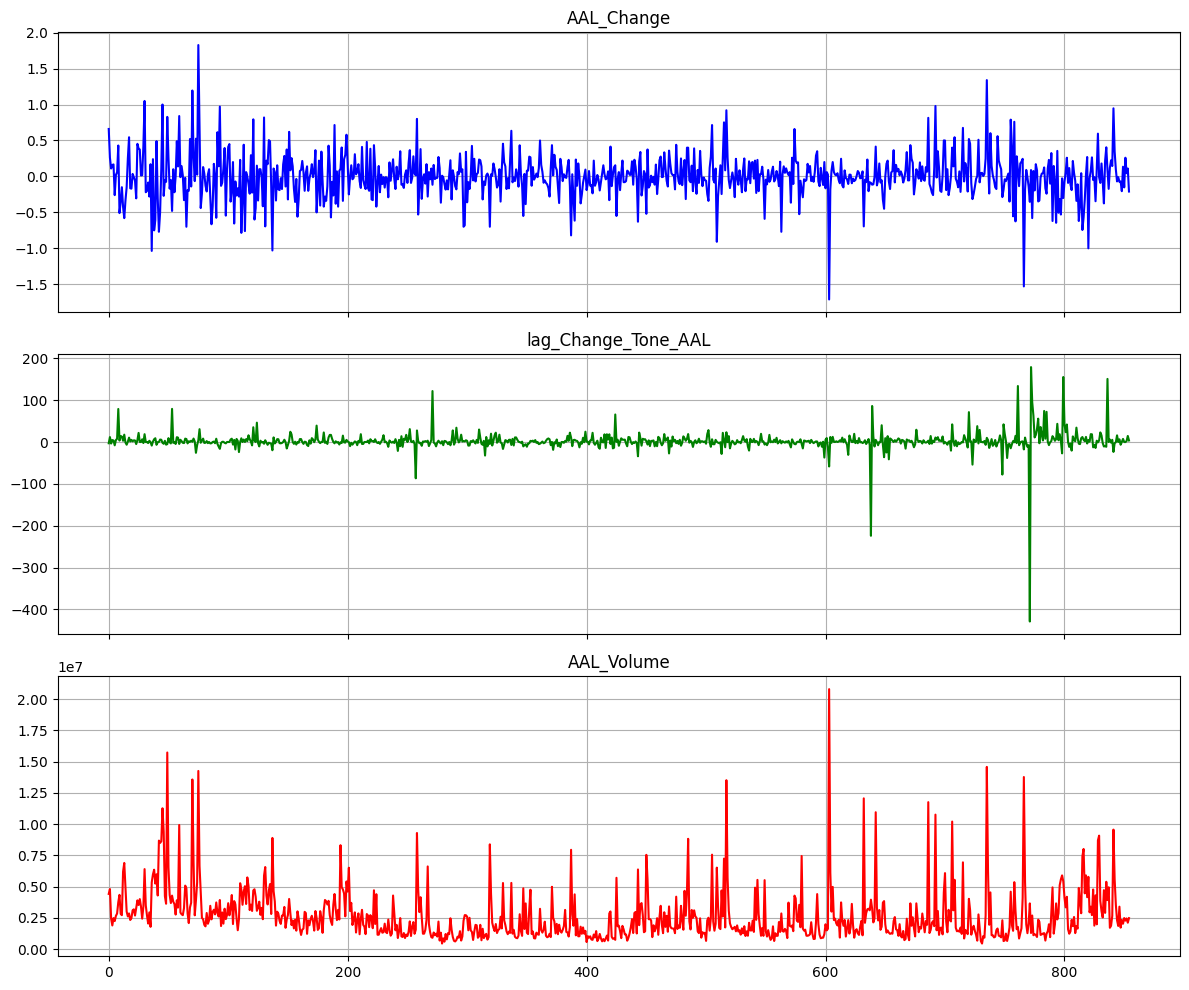

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot each variable on separate axes
axes[0].plot(df_filter.index, df_filter['AAL_Change'], 'b-')
axes[0].set_title('AAL_Change')
axes[0].grid(True)

axes[1].plot(df_filter.index, df_filter['lag_Change_Tone_AAL'], 'g-')
axes[1].set_title('lag_Change_Tone_AAL')
axes[1].grid(True)

axes[2].plot(df_filter.index, df_filter['AAL_Volume'], 'r-')
axes[2].set_title('AAL_Volume')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [41]:
df_filter[['AAL_Change', 'lag_Change_Tone_AAL', 'AAL_Volume']].corr()

,AAL_Change,lag_Change_Tone_AAL,AAL_Volume
AAL_Change,1.000000,0.060800,0.096674
lag_Change_Tone_AAL,0.060800,1.000000,-0.027577
AAL_Volume,0.096674,-0.027577,1.000000


In [ ]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PCA_GKG1_0_AAL on primary axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.scatter(df_filter.index, df_filter['lag_Change_Tone_AAL_8'], color=color, label='lag_Change_Tone_AAL_8')

# Create secondary axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.scatter(df_filter.index, df_filter['AAL_Change'], color=color, label='AAL_Change')

ax3 = ax1.twinx()
color = 'tab:purple'
ax2.scatter(df_filter.index, df_filter['AAL_Volume'], color=color, label='AAL_Volume')

# Add title and adjust layout
plt.title('Comparison of lag_Change_Tone_AAL_8 and AAL_Change')
fig.tight_layout()

# Create legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, lines3 + labels3, loc='best')

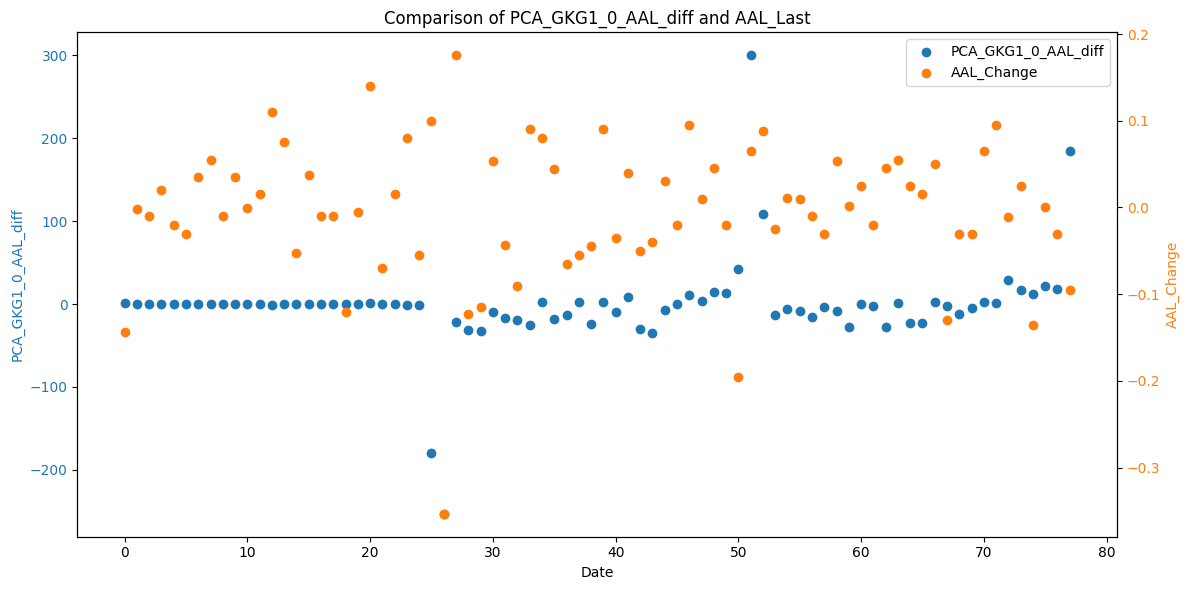

In [58]:
df_filter = df[
    (df.index >= datetime.datetime(2025, 1, 29, 0, 0, 0)) &
    (df.index <= datetime.datetime(2025, 2, 2, 0, 0, 0))
]

df_filter['datetime'] = df_filter.index
df_filter=df_filter.reset_index(drop=True)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PCA_GKG1_0_AAL on primary axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('PCA_GKG1_0_AAL_diff', color=color)
ax1.scatter(df_filter.index, df_filter['PCA_GKG1_0_AAL_diff'], color=color, label='PCA_GKG1_0_AAL_diff')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('AAL_Change', color=color)
ax2.scatter(df_filter.index, df_filter['AAL_Change'], color=color, label='AAL_Change')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('Comparison of PCA_GKG1_0_AAL_diff and AAL_Last')
fig.tight_layout()

# Create legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.show()

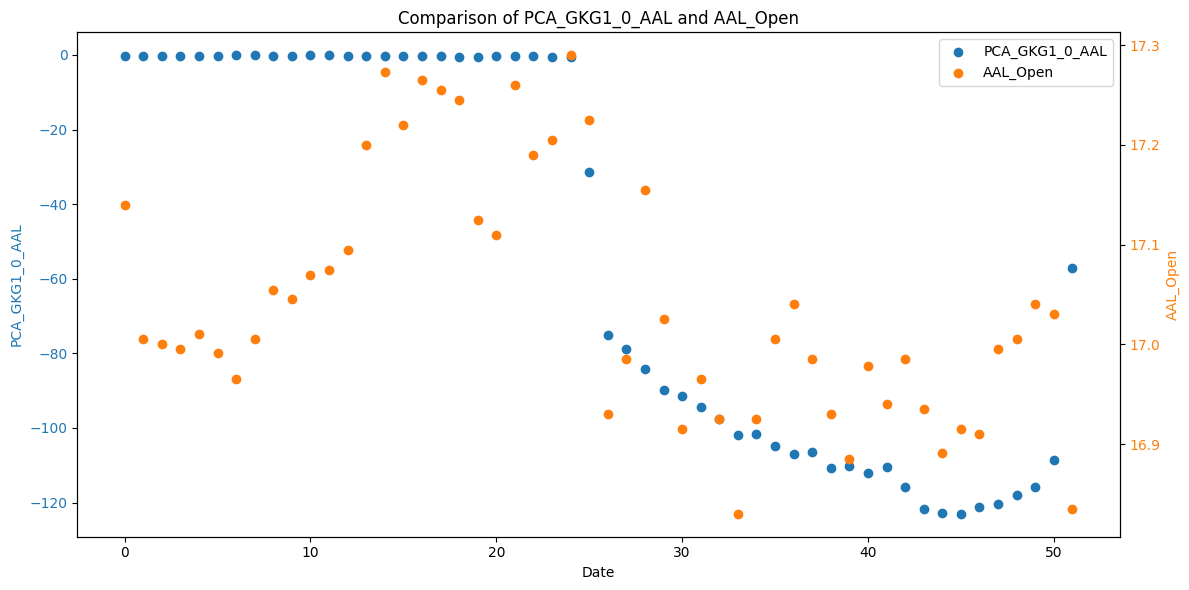

In [57]:
df_filter = df[
    (df.index >= datetime.datetime(2025, 1, 29, 0, 0, 0)) &
    (df.index <= datetime.datetime(2025, 1, 31, 0, 0, 0))
]

df_filter['datetime'] = df_filter.index
df_filter=df_filter.reset_index(drop=True)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PCA_GKG1_0_AAL on primary axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('PCA_GKG1_0_AAL', color=color)
ax1.scatter(df_filter.index, df_filter['PCA_GKG1_0_AAL'], color=color, label='PCA_GKG1_0_AAL')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('AAL_Open', color=color)
ax2.scatter(df_filter.index, df_filter['AAL_Open'], color=color, label='AAL_Open')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('Comparison of PCA_GKG1_0_AAL and AAL_Open')
fig.tight_layout()

# Create legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.show()

In [59]:
df_filter[['datetime', 'AAL_Change', 'PCA_GKG1_0_AAL_diff', 'PCA_GKG1_1_AAL_diff', 'PCA_GKG1_2_AAL_diff']]

,datetime,AAL_Change,PCA_GKG1_0_AAL_diff,PCA_GKG1_1_AAL_diff,PCA_GKG1_2_AAL_diff
0,2025-01-29 09:30:00,-0.1434,0.781741,-0.434475,-0.111285
1,2025-01-29 09:45:00,-0.0016,0.379508,-0.333139,-0.655131
2,2025-01-29 10:00:00,-0.0100,-0.382228,0.467086,0.442292
3,2025-01-29 10:15:00,0.0200,-0.124485,0.383005,0.403063
4,2025-01-29 10:30:00,-0.0198,0.528398,-0.812943,-1.157345
...,...,...,...,...,...
73,2025-01-31 14:45:00,0.0252,16.350082,-4.302206,-7.133916
74,2025-01-31 15:00:00,-0.1350,11.895696,-4.275525,-6.812488
75,2025-01-31 15:15:00,0.0000,21.784068,-10.032958,-14.732391
76,2025-01-31 15:30:00,-0.0300,18.651238,-11.982560,-14.027240


In [14]:
test=df_filter['AAL_Open']
test

0     17.1400
1     17.0050
2     17.0000
3     16.9950
4     17.0100
5     16.9914
6     16.9650
7     17.0050
8     17.0550
9     17.0450
10    17.0700
11    17.0750
12    17.0950
13    17.2001
14    17.2731
15    17.2200
16    17.2650
17    17.2550
18    17.2450
19    17.1250
20    17.1100
21    17.2600
22    17.1900
23    17.2050
24    17.2900
25    17.2250
26    16.9300
27    16.9850
28    17.1550
29    17.0250
30    16.9152
31    16.9650
32    16.9250
33    16.8300
34    16.9250
35    17.0050
36    17.0400
37    16.9850
38    16.9300
39    16.8850
40    16.9781
41    16.9400
42    16.9850
43    16.9350
44    16.8910
45    16.9150
46    16.9099
47    16.9950
48    17.0050
49    17.0400
50    17.0300
51    16.8350
Name: AAL_Open, dtype: float64

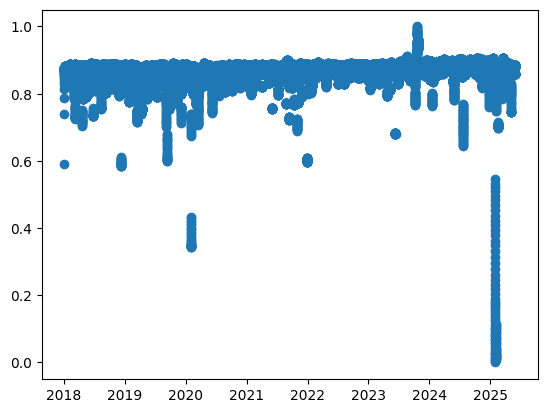

In [15]:
plt.scatter(df.index, df['PCA_GKG1_0_AAL_rolling_mean26'])